In [5]:
from featureranker.rankers import *
from featureranker.utils import *
from featureranker.plots import *

import pandas as pd
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [5]:
# Load your dataset
file_path = 'nhpi-alone_poverty-status_nhpi-below-poverty-past-year_2021_statecounty.csv'
df = pd.read_csv(file_path)

# Remove specified columns
df = df.drop(columns=[
                 'nhpi-alone_median-household-income-inflation-adjusted_past-year', 'statecounty'])

# Set the target variable
target = 'nhpi-alone_poverty-status_nhpi-below-poverty-past-year'

# Separate features and target variable
X = df.drop(columns=[target])
y = df[target]
view_data(df)

There are no NaN values in the dataset


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; tot

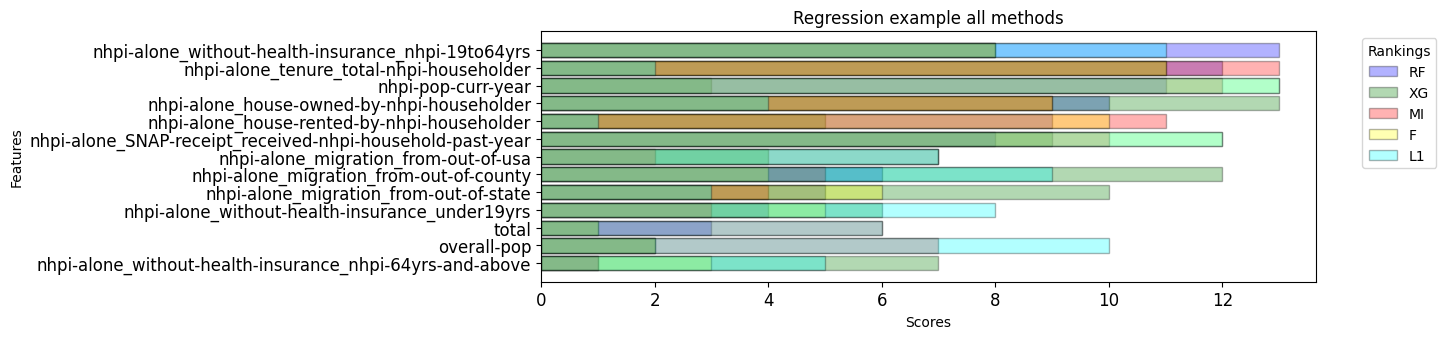

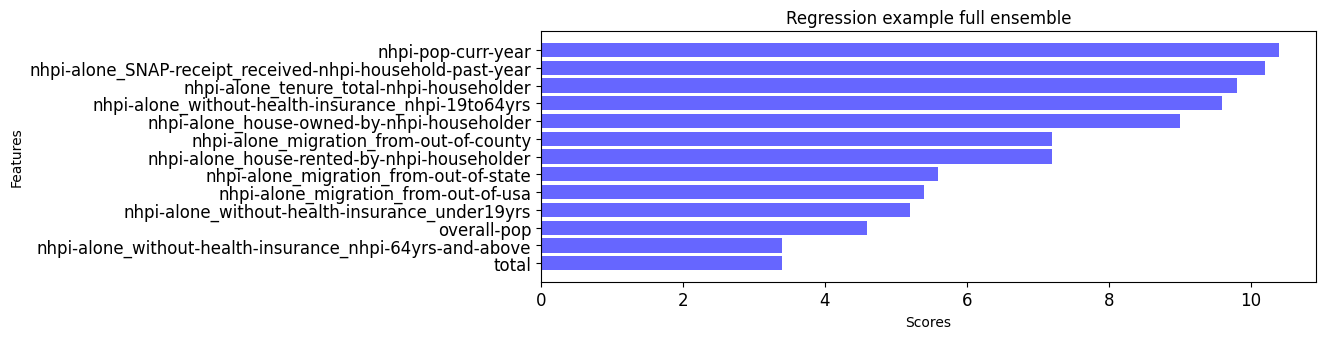

In [7]:
# Minimum settings
rankings = regression_ranking(X, y, predict=False)
scoring = voting(rankings)
plot_rankings(rankings, title='Regression example all methods')
plot_after_vote(scoring, title='Regression example full ensemble')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; tot

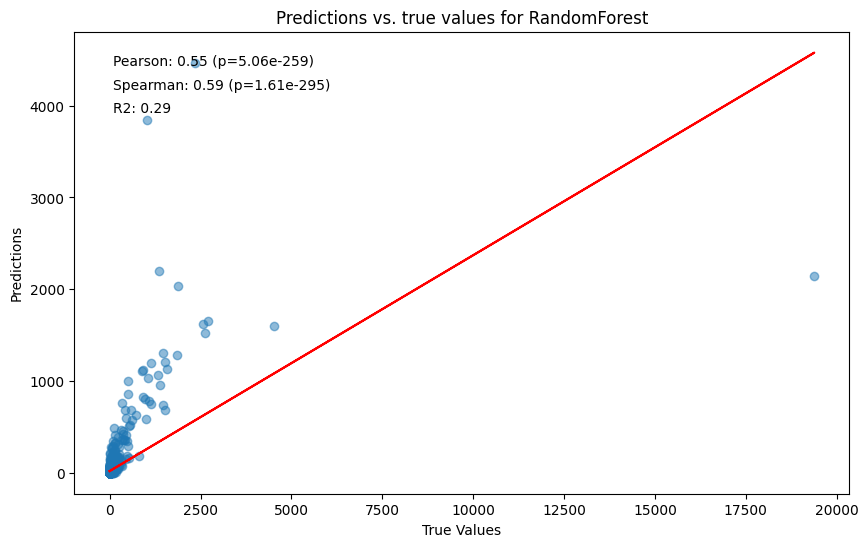

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END colsample_bytree=0.9444444444444444, gamma=0.3333333333333333, learning_rate=0.023853323044733008, max_depth=3, min_child_weight=7, n_estimators=129, reg_alpha=2.1544346900318834, reg_lambda=0.1, subsample=0.7222222222222222; total time=   0.1s
[CV] END colsample_bytree=0.9444444444444444, gamma=0.3333333333333333, learning_rate=0.023853323044733008, max_depth=3, min_child_weight=7, n_estimators=129, reg_alpha=2.1544346900318834, reg_lambda=0.1, subsample=0.7222222222222222; total time=   0.1s
[CV] END colsample_bytree=0.9444444444444444, gamma=0.3333333333333333, learning_rate=0.023853323044733008, max_depth=3, min_child_weight=7, n_estimators=129, reg_alpha=2.1544346900318834, reg_lambda=0.1, subsample=0.7222222222222222; total time=   0.1s
[CV] END colsample_bytree=0.5555555555555556, gamma=0.5, learning_rate=0.5, max_depth=50, min_child_weight=1, n_estimators=100, reg_alpha=4.6415888336127775, reg_lambda=100.0, su

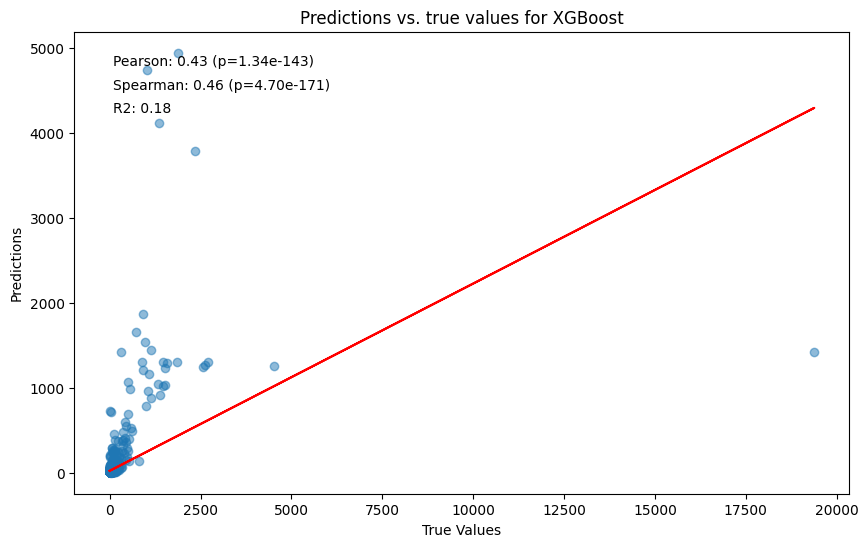

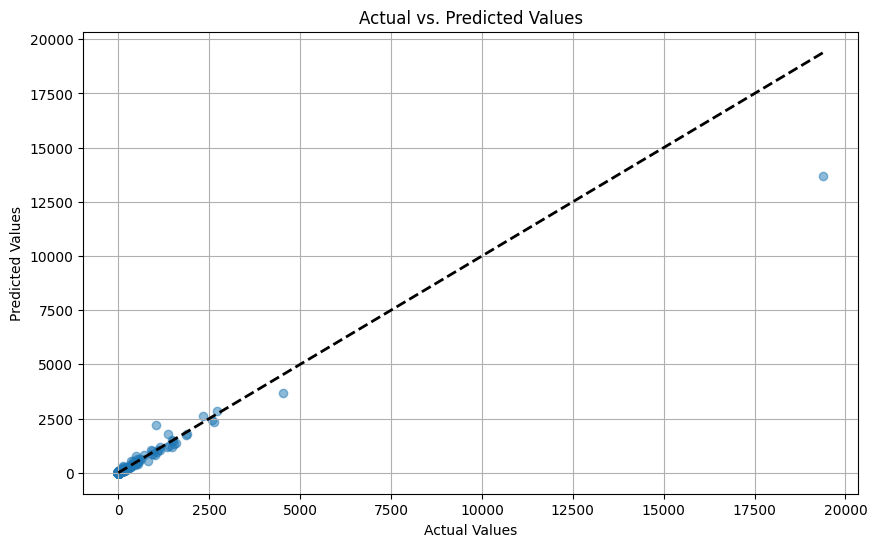

In [13]:
rankings = regression_ranking(X, y, predict=True)

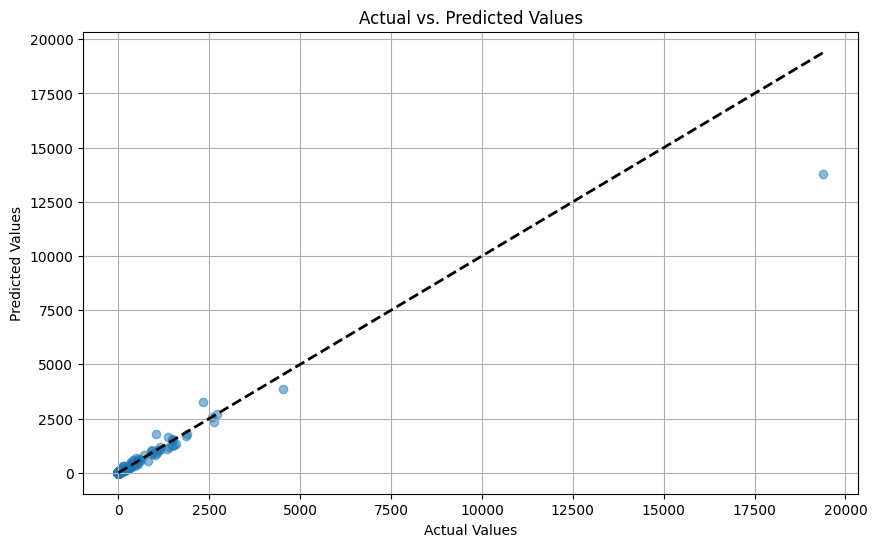

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; tot

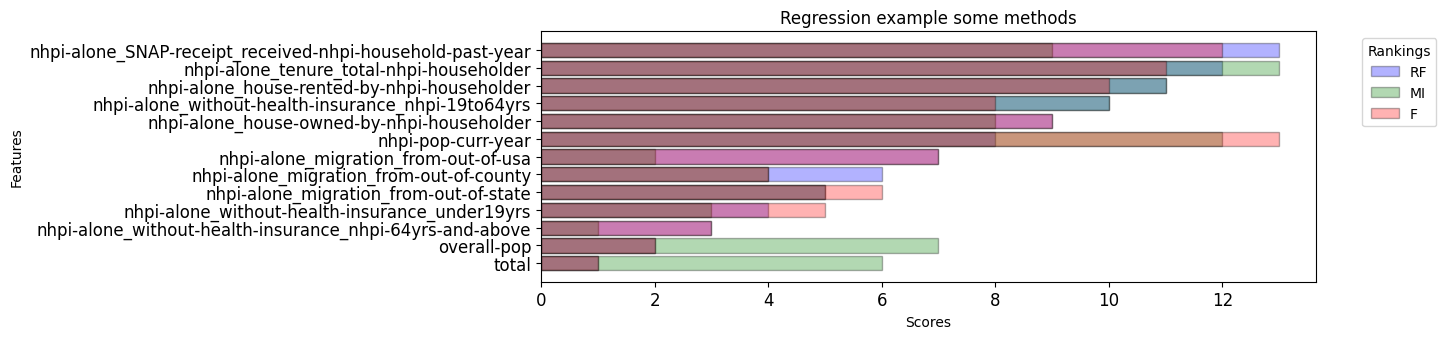

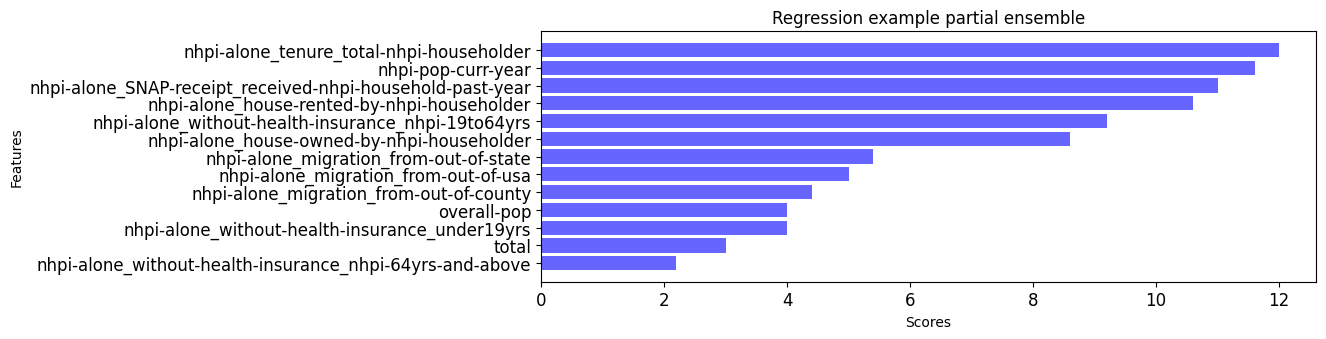

In [37]:
# Try different methods and different weights
rankings = regression_ranking(X, y, predict=False, choices=[
                              'mi', 'f_test', 'rf', 'enet'])
scoring = voting(rankings, weights=(0.2, 0.4, 0.4))
plot_rankings(rankings, title='Regression example some methods')
plot_after_vote(scoring, title='Regression example partial ensemble')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; tot

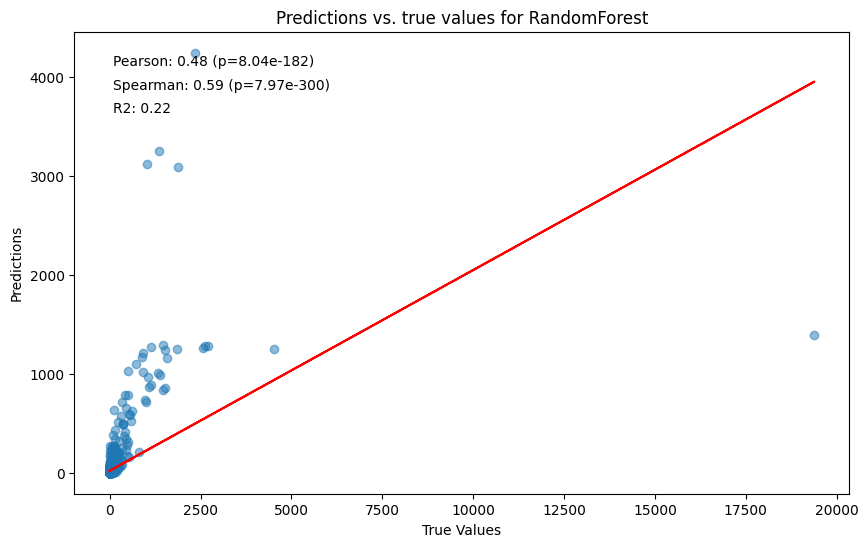

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.5555555555555556, gamma=0.5, learning_rate=0.5, max_depth=50, min_child_weight=1, n_estimators=100, reg_alpha=4.6415888336127775, reg_lambda=100.0, subsample=0.7777777777777778; total time=   1.1s
[CV] END colsample_bytree=0.5555555555555556, gamma=0.5, learning_rate=0.5, max_depth=50, min_child_weight=1, n_estimators=100, reg_alpha=4.6415888336127775, reg_lambda=100.0, subsample=0.7777777777777778; total time=   1.2s
[CV] END colsample_bytree=0.5555555555555556, gamma=0.5, learning_rate=0.5, max_depth=50, min_child_weight=1, n_estimators=100, reg_alpha=4.6415888336127775, reg_lambda=100.0, subsample=0.7777777777777778; total time=   1.2s
[CV] END colsample_bytree=0.9444444444444444, gamma=0.3333333333333333, learning_rate=0.023853323044733008, max_depth=3, min_child_weight=7, n_estimators=129, reg_alpha=2.1544346900318834, reg_lambda=0.1, subsample=0.7222222222222222; total time=   0.2s
[CV] END 

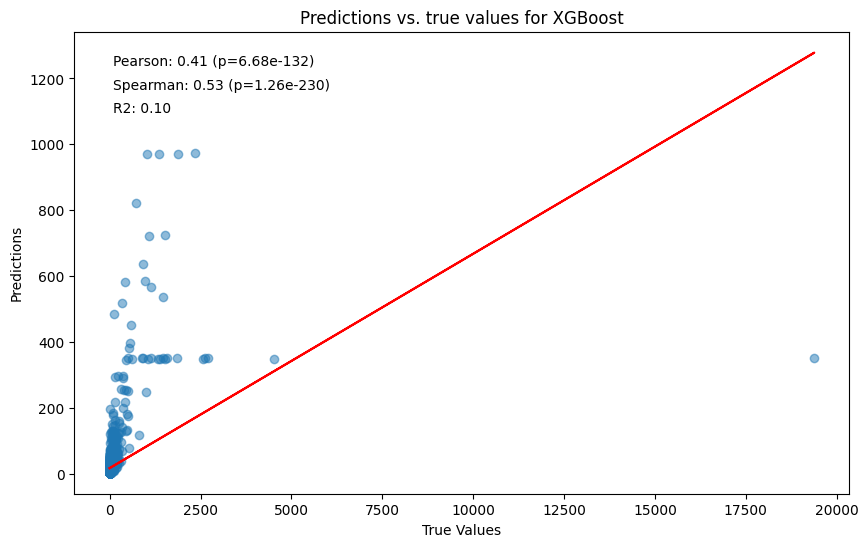

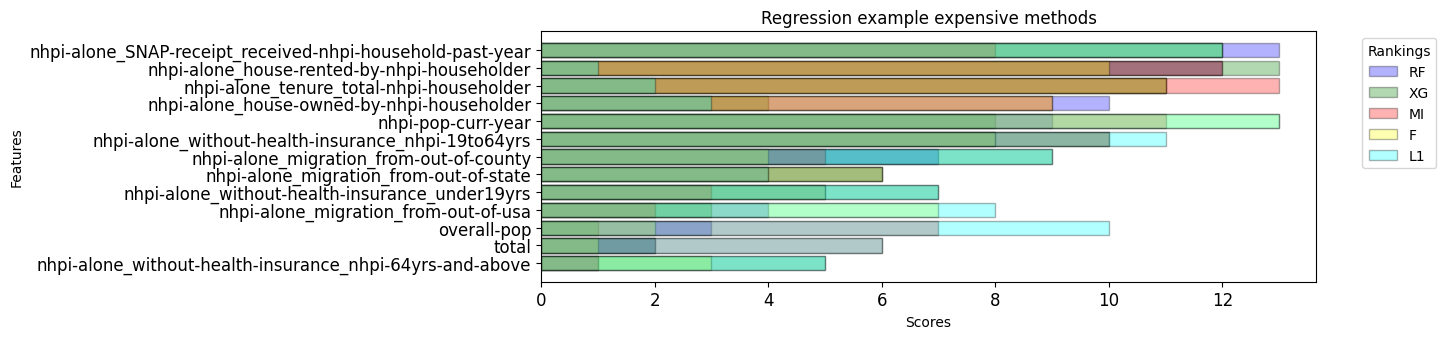

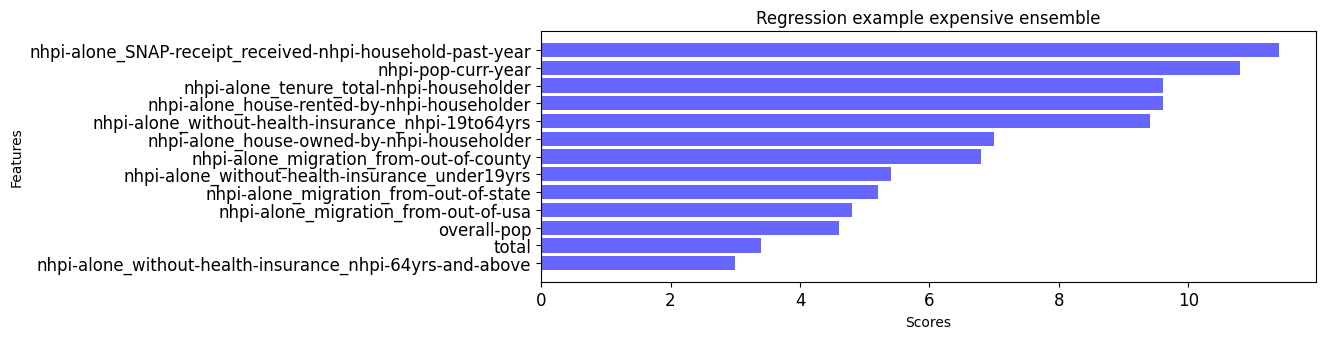

In [6]:
rankings = regression_ranking(X, y, cv=5, num_runs=30, scale=1e-30, num_alphas=10000, predict=True)
scoring = voting(rankings)
plot_rankings(rankings, title='Regression example expensive methods')
plot_after_vote(scoring, title='Regression example expensive ensemble')
# Performance is slighlty better (explains more variance) and more nuanced feature ranking towards the less influential features

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler


def elastic_net_regression_ranking(X, y, num_alphas=100, l1_ratio=0.5, norm=True, verbose=False):
    columns = X.columns.tolist()
    if norm:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X

    enet_cv = ElasticNetCV(
        l1_ratio=l1_ratio, n_alphas=num_alphas, verbose=verbose)
    enet_cv.fit(X_scaled, y)
    coefs = enet_cv.coef_

    ranking = pd.DataFrame({
        'Feature': columns,
        'Score': np.abs(coefs)
    }).sort_values(by='Score', ascending=False).reset_index(drop=True)

    return ranking

In [28]:
from featureranker.rankers import *


rankings = elastic_net_regression_ranking(
    X, y, num_alphas=100, l1_ratio=0.5, norm=True, verbose=True)
print(rankings)



                                              Feature      Score
0   nhpi-alone_SNAP-receipt_received-nhpi-househol...  70.963124
1                                  nhpi-pop-curr-year  66.813972
2            nhpi-alone_tenure_total-nhpi-householder  50.905857
3         nhpi-alone_house-rented-by-nhpi-householder  50.563008
4          nhpi-alone_house-owned-by-nhpi-householder  49.921797
5   nhpi-alone_without-health-insurance_nhpi-19to6...  48.511238
6                nhpi-alone_migration_from-out-of-usa  27.247130
7                                         overall-pop  15.344921
8              nhpi-alone_migration_from-out-of-state  10.852392
9   nhpi-alone_without-health-insurance_nhpi-64yrs...   6.837059
10            nhpi-alone_migration_from-out-of-county   6.396297
11                                              total   1.984885
12     nhpi-alone_without-health-insurance_under19yrs   1.732942


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

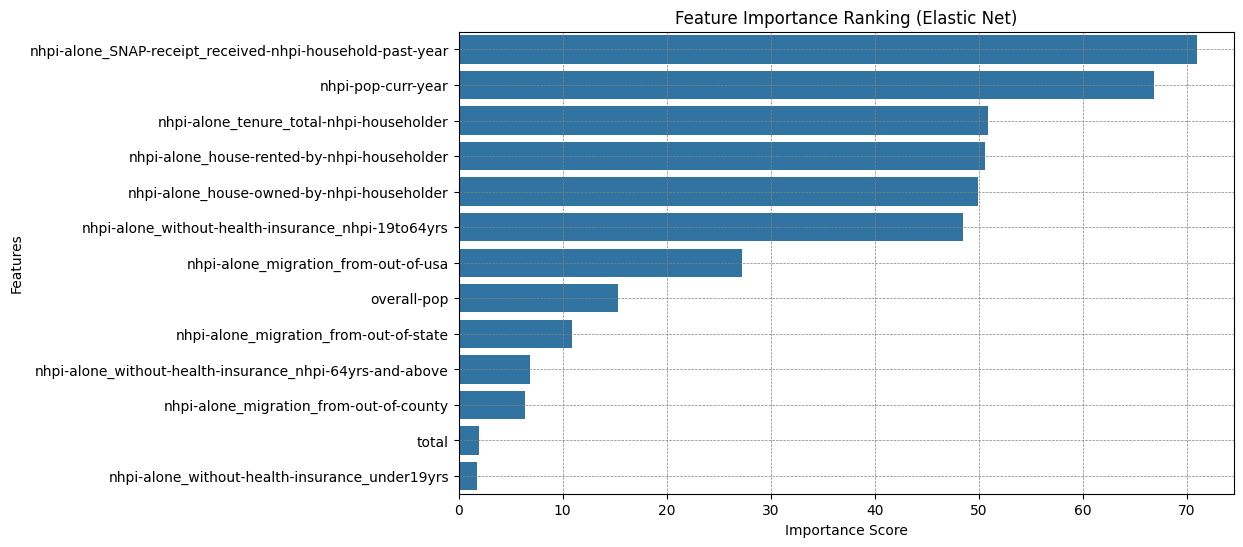

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for styling
# Make sure this line follows directly after you have your 'rankings' DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# Using seaborn for a nicer plot (optional)
sns.barplot(x='Score', y='Feature', data=rankings)

plt.title('Feature Importance Ranking (Elastic Net)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True, which='major', linestyle='--', linewidth='0.5',
         color='grey')  # Add grid for easier readability
plt.show()

                                                   L1  Score
10                                 nhpi-pop-curr-year    999
4   nhpi-alone_SNAP-receipt_received-nhpi-househol...    996
8   nhpi-alone_without-health-insurance_nhpi-19to6...    971
11                                        overall-pop    924
0             nhpi-alone_migration_from-out-of-county    902
2                nhpi-alone_migration_from-out-of-usa    900
7      nhpi-alone_without-health-insurance_under19yrs    895
12                                              total    883
9   nhpi-alone_without-health-insurance_nhpi-64yrs...    879
1              nhpi-alone_migration_from-out-of-state    878
5          nhpi-alone_house-owned-by-nhpi-householder    874
3            nhpi-alone_tenure_total-nhpi-householder    859
6         nhpi-alone_house-rented-by-nhpi-householder    839


<Figure size 1000x600 with 0 Axes>

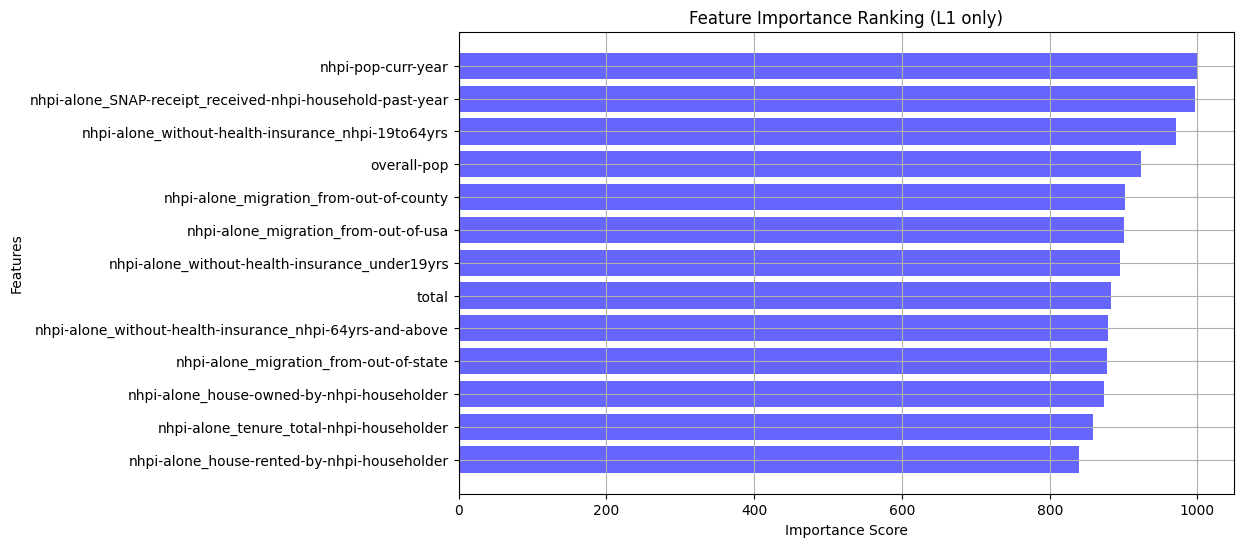

L1       0
Score    0
dtype: int64


ValueError: Could not interpret value `Feature` for `y`. An entry with this name does not appear in `data`.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for styling
from featureranker.rankers import *

# scale=1e-20, num_alphas=1000, norm=True, verbose=False
rankings2 = l1_regression_ranking(
    X, y)
# Make sure this line follows directly after you have your 'rankings' DataFrame


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# Using seaborn for a nicer plot (optional)
print(rankings2)


plt.figure(figsize=(10, 6))
plt.barh(rankings2['L1'], rankings2['Score'], color='blue', alpha=0.6)
plt.gca().invert_yaxis()  # To invert y-axis
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking (L1 only)')
plt.grid(True)
plt.show()

print(rankings2.isnull().sum())

sns.barplot(x='Score', y='Feature', data=rankings2)

plt.title('Feature Importance Ranking (L1 only)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True, which='major', linestyle='--', linewidth='0.5',
         color='grey')  # Add grid for easier readability
plt.show()